## Este notebook es encargado de generar un CSV que consolide todas las pruebas y estandarice los valores de cada columna

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing
import math

In [2]:
df_1 = pd.read_csv("..//resources//csv//data//sujeto1-rocio-2020-10-25-biometrics.csv")
df_2 = pd.read_csv("..//resources//csv//data//sujeto2-juan-2020-11-01-biometrics.csv")
df_3 = pd.read_csv("..//resources//csv//data//sujeto3-brenda-2020-11-15-biometrics.csv")
df_4 = pd.read_csv("..//resources//csv//data//sujeto4-matias-2020-11-15-biometrics.csv")
df_5 = pd.read_csv("..//resources//csv//data//sujeto5-sebastian-2020-01-05-biometrics.csv")
df_6 = pd.read_csv("..//resources//csv//data//sujeto6-rocio-2021-01-07-biometrics.csv")

dfs = [df_1, df_2, df_3, df_4, df_5, df_6]

In [3]:
df_1.head()

,TimeStamp,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD,PhaseName,MatchesSam
0,10/25/2020 19:00,84.9,707,0.10,0.91,0,0,0.0,0.0,0.0,0.0,NaN,False
1,10/25/2020 19:00,83.6,718,12.71,0.91,0,0,0.0,0.0,0.0,0.0,NaN,False
2,10/25/2020 19:00,80.9,742,0.00,0.91,0,0,0.0,0.0,0.0,0.0,NaN,False
3,10/25/2020 19:00,83.0,723,0.00,0.91,0,0,0.0,0.0,0.0,0.0,NaN,False
4,10/25/2020 19:00,83.8,716,0.00,0.90,0,0,0.0,0.0,0.0,0.0,NaN,False


In [4]:
# Función que determina cuando un sujeto se encuentra en un estado de excitación (1) o relajación (0) dado un valor de arousal.
def isAroused(arousal):
    return 0 if arousal < 5 else 1

# Función que estandariza las columas dadas de un dataframe
def standarize(df):
    df_to_standarize = df.copy()
    
    # Se remueven las mediciones sin estímulo (previas al inicio de estímulos), para no ofuscar el entrenamiento
    filterNoArousalMeasurements = df_to_standarize['ArousalMean'] > 0
    df_to_standarize = df_to_standarize[filterNoArousalMeasurements]

    # remover las mediciones para las que el sam no coincidió antes de la estandarización, para no afectar la desviación
    # filterNoMatchesSAMMeasurements = filtered1['MatchesSam'] == True
    # df_to_standarize = df_to_standarize[filterNoMatchesSAMMeasurements]
    
    # Se agrega la columna Aroused (0/1) para la clasificación binaria
    df_to_standarize['Aroused'] = df_to_standarize['ArousalMean'].map(isAroused)
    
    columns_to_standarize = ['HR', 'RR', 'HRV', 'MicroSiemens']

    scaler = preprocessing.StandardScaler()
    standarized_df = scaler.fit_transform(df_to_standarize[columns_to_standarize])

    standarized_df_with_rest_of_data = np.append(standarized_df, df_to_standarize[['SCR', 'SCR_MIN', 'PhaseName', 'ArousalMean', 'Aroused']], axis=1)
    
    # Se convierte a DataFrame
    standarized_df_with_rest_of_data = pd.DataFrame(standarized_df_with_rest_of_data, columns=['HR', 'RR', 'HRV', 'MicroSiemens', 'SCR', 'SCR_MIN', 'PhaseName', 'ArousalMean', 'Aroused'])
    
    # Conversión de tipos
    standarized_df_with_rest_of_data['HR'] = standarized_df_with_rest_of_data['HR'].astype(float)
    standarized_df_with_rest_of_data['RR'] = standarized_df_with_rest_of_data['RR'].astype(float)
    standarized_df_with_rest_of_data['HRV'] = standarized_df_with_rest_of_data['HRV'].astype(float)
    standarized_df_with_rest_of_data['MicroSiemens'] = standarized_df_with_rest_of_data['MicroSiemens'].astype(float)
    standarized_df_with_rest_of_data['SCR'] = standarized_df_with_rest_of_data['SCR'].astype(int)
    standarized_df_with_rest_of_data['SCR_MIN'] = standarized_df_with_rest_of_data['SCR_MIN'].astype(int)
    standarized_df_with_rest_of_data['PhaseName'] = standarized_df_with_rest_of_data['PhaseName']
    standarized_df_with_rest_of_data['ArousalMean'] = standarized_df_with_rest_of_data['ArousalMean'].astype(float)
    standarized_df_with_rest_of_data['Aroused'] = standarized_df_with_rest_of_data['Aroused'].astype(int)

    return standarized_df_with_rest_of_data

In [5]:
# Se estandariza cada dataframe
standarized_dfs = list(map(standarize, dfs))

# Se los une a todos en un solo dataframe para entrenamiento luego de la estandarización
biometrics_df = pd.concat(standarized_dfs)

# Save dataframe to CSV

In [6]:
biometrics_df.to_csv(r'./1_standarized_biometrics.csv', index = False)

# Exploratory Data Analysis (EDA)

In [26]:
df_to_explore = biometrics_df # todos los sujetos consolidados
# df_to_explore = standarized_dfs[0] # Sujeto 1
# df_to_explore = standarized_dfs[1] # Sujeto 2
# df_to_explore = standarized_dfs[2] # Sujeto 3
# df_to_explore = standarized_dfs[3] # Sujeto 4
# df_to_explore = standarized_dfs[4] # Sujeto 5
# df_to_explore = standarized_dfs[5] # Sujeto 6

In [27]:
df_to_explore.head()

,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,PhaseName,ArousalMean,Aroused
0,0.180957,-0.246737,-0.638383,1.604263,0,0,HA_PV,6.07,1
1,0.463350,-0.508771,-0.930989,1.357679,0,0,HA_PV,6.07,1
2,0.419905,-0.468458,-1.085573,1.357679,0,0,HA_PV,6.07,1
3,0.419905,-0.468458,-1.121459,1.111095,0,0,HA_PV,7.31,1
4,0.506795,-0.549084,-1.088333,1.111095,0,0,HA_PV,7.31,1


In [28]:
df_to_explore.describe()

,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,Aroused
count,2.562000e+03,2.562000e+03,2.562000e+03,2.562000e+03,2562.000000,2562.000000,2562.000000,2562.000000
mean,-4.624196e-16,-1.128857e-16,9.347194e-17,-5.731386e-16,0.141686,2.686183,5.566362,0.580016
std,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,0.348796,1.948547,1.605978,0.493652
min,-2.851320e+00,-3.674467e+00,-1.670785e+00,-2.341079e+00,0.000000,0.000000,2.500000,0.000000
25%,-6.669699e-01,-6.332741e-01,-7.403701e-01,-8.303433e-01,0.000000,1.000000,3.942308,0.000000
50%,-7.283495e-02,1.409951e-02,-2.844827e-01,-9.657528e-02,0.000000,3.000000,6.153846,1.000000
75%,5.936856e-01,6.572536e-01,4.953982e-01,6.179274e-01,0.000000,4.000000,7.000000,1.000000
max,4.298148e+00,3.371223e+00,2.984350e+00,3.624243e+00,1.000000,8.000000,7.826923,1.000000


In [29]:
df_to_explore.groupby('Aroused').size()

Aroused
0    1076
1    1486
dtype: int64

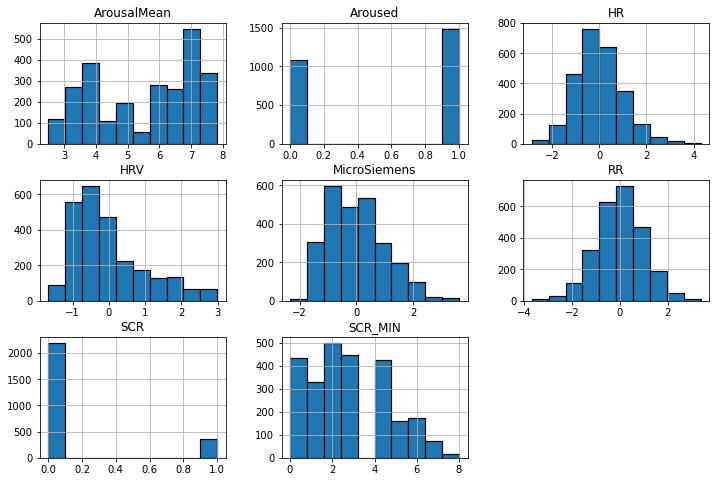

In [30]:
df_to_explore.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));

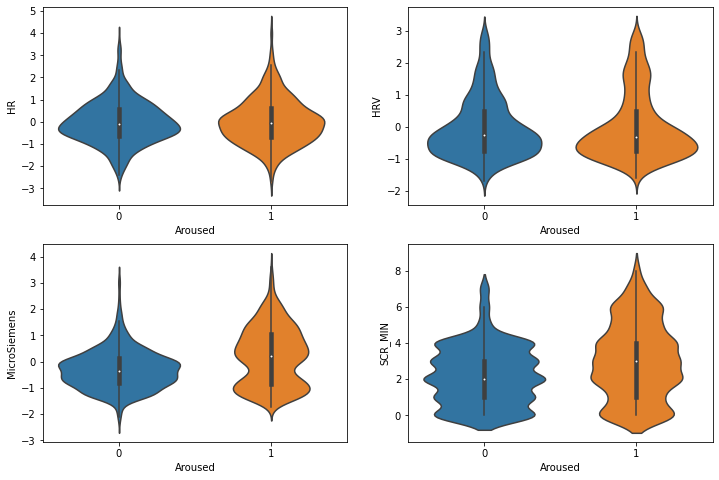

In [31]:
plt.figure(figsize=(12,8));
plt.subplot(2,2,1)
sns.violinplot(x='Aroused', y='HR', data=df_to_explore)
plt.subplot(2,2,2)
sns.violinplot(x='Aroused', y='HRV', data=df_to_explore)
plt.subplot(2,2,3)
sns.violinplot(x='Aroused', y='MicroSiemens', data=df_to_explore)
plt.subplot(2,2,4)
sns.violinplot(x='Aroused', y='SCR_MIN', data=df_to_explore);

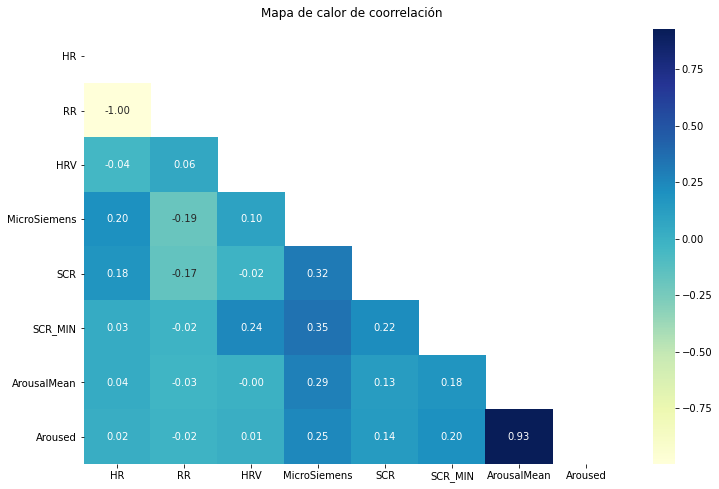

In [32]:
plt.figure(figsize=(12,8))
# filtered = biometrics_df[cols]
mask = np.triu(np.ones_like(df_to_explore.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_to_explore.corr(), annot=True, mask=mask, fmt=".2f", cmap='YlGnBu')
heatmap.set_title('Mapa de calor de coorrelación', fontdict={'fontsize':12}, pad=12);

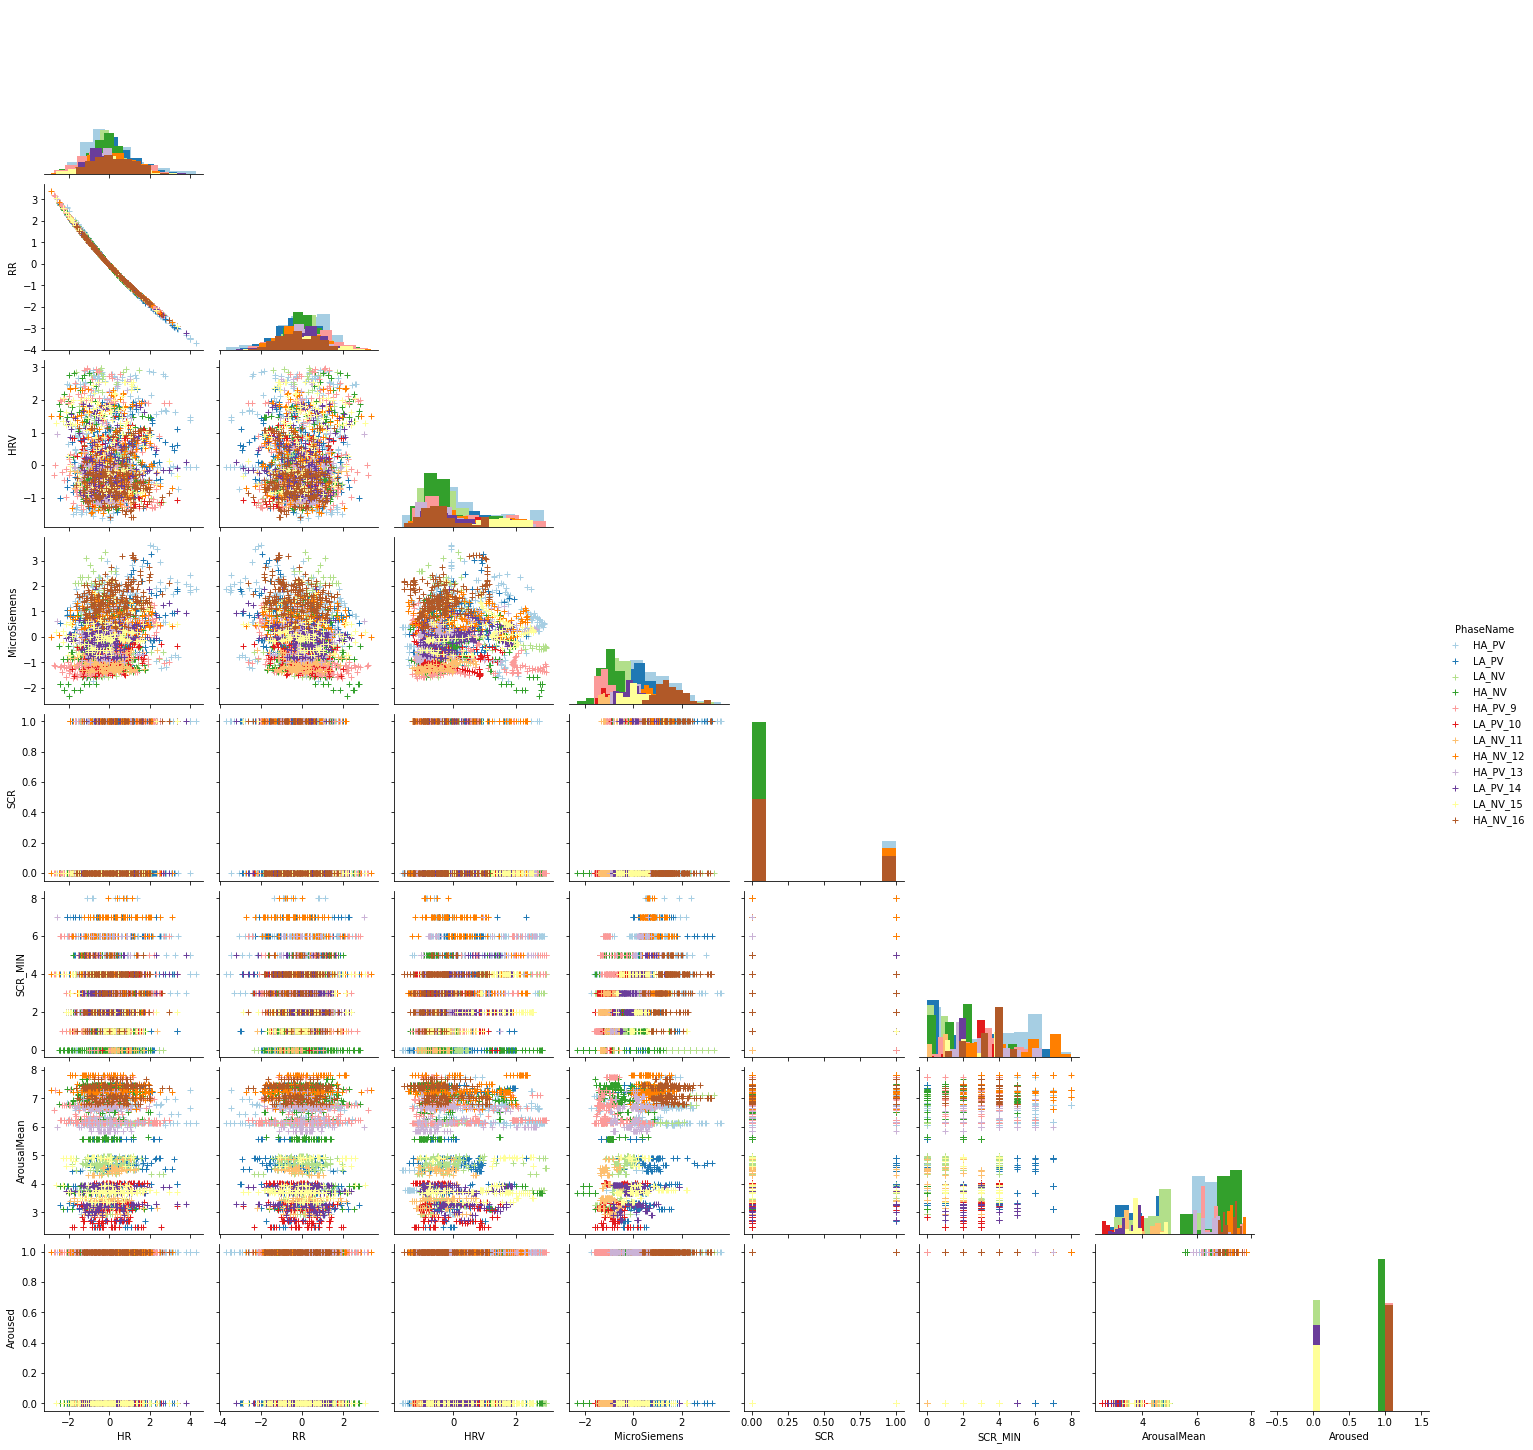

In [33]:
sns.pairplot(df_to_explore, palette='Paired', hue='PhaseName', corner=True, diag_kind="hist", plot_kws=dict(marker="+", linewidth=1))
# for df in standarized_dfs:
#     sns.pairplot(df, vars=cols, palette='Paired', hue='PhaseName', corner=True, diag_kind="hist", plot_kws=dict(marker="+", linewidth=1))
#     sns.pairplot(df, vars=cols, palette='Paired', hue='Aroused', hue_order=[1, 0], corner=True, diag_kind="hist", plot_kws=dict(marker="+", linewidth=1))